## Topic Modeling with Gensim

In [124]:
from textblob import TextBlob
import pandas as pd

import pandas as pd
import re
import nltk
from gensim import models, corpora, matutils
import numpy as np
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

In [125]:
AirlineData = pd.read_csv('/Users/invictus/Desktop/AirlineData.csv')

In [126]:
AirlineData

,Unnamed: 0,_unit_id,airline,name,retweet_count,text,tweet_created,tweet_id,tweet_location
0,0,681448150,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2/24/15 11:35,5.700000e+17,NaN
1,1,681448153,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,5.700000e+17,NaN
2,2,681448156,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,5.700000e+17,Lets Play
3,3,681448158,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,5.700000e+17,NaN
4,4,681448159,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,5.700000e+17,NaN
...,...,...,...,...,...,...,...,...,...
14635,14635,681679794,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2/22/15 12:01,5.700000e+17,NaN
14636,14636,681679795,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2/22/15 11:59,5.700000e+17,Texas
14637,14637,681679796,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2/22/15 11:59,5.700000e+17,"Nigeria,lagos"
14638,14638,681679797,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2/22/15 11:59,5.700000e+17,New Jersey


In [127]:
def clean(text):
    text = re.sub(r'@[^\s]+','',text)
    text = re.sub(r' \d+', '', text)
    text = re.sub(r'[^\w\s]','',text).lower()
    text = re.sub(r'\b\w{1}\b', ' ', text)
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in symbols:
        text = text.replace(i, ' ') 
    text = text.strip()
    words = re.split(r'\W+', text)
    words = [word for word in words if len(word)>1]
    non_stop_words = [word for word in words if word not in stopword]
    lem_words = [wn.lemmatize(word) for word in non_stop_words]
    clean_text = ' '.join(lem_words)
    return clean_text.strip()

In [128]:
AirlineData['cleaned_text'] = AirlineData.text.apply(clean)

In [129]:
AirlineData

,Unnamed: 0,_unit_id,airline,name,retweet_count,text,tweet_created,tweet_id,tweet_location,cleaned_text
0,0,681448150,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2/24/15 11:35,5.700000e+17,NaN,said
1,1,681448153,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,5.700000e+17,NaN,plus youve added commercial experience tacky
2,2,681448156,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,5.700000e+17,Lets Play,didnt today must mean need take another trip
3,3,681448158,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,5.700000e+17,NaN,really aggressive blast obnoxious entertainmen...
4,4,681448159,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,5.700000e+17,NaN,really big bad thing
...,...,...,...,...,...,...,...,...,...,...
14635,14635,681679794,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2/22/15 12:01,5.700000e+17,NaN,thank got different flight chicago
14636,14636,681679795,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2/22/15 11:59,5.700000e+17,Texas,leaving minute late flight warning communicati...
14637,14637,681679796,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2/22/15 11:59,5.700000e+17,"Nigeria,lagos",please bring american airline blackberry10
14638,14638,681679797,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2/22/15 11:59,5.700000e+17,New Jersey,money change flight dont answer phone suggesti...


In [130]:
AirlineData['cleaned_text'].str.split(' ')

0                                                   [said]
1        [plus, youve, added, commercial, experience, t...
2        [didnt, today, must, mean, need, take, another...
3        [really, aggressive, blast, obnoxious, enterta...
4                                [really, big, bad, thing]
                               ...                        
14635             [thank, got, different, flight, chicago]
14636    [leaving, minute, late, flight, warning, commu...
14637     [please, bring, american, airline, blackberry10]
14638    [money, change, flight, dont, answer, phone, s...
14639    [ppl, need, know, many, seat, next, flight, pl...
Name: cleaned_text, Length: 14640, dtype: object

In [131]:
word_dictionary = corpora.Dictionary(AirlineData['cleaned_text'].str.split(' '))

In [132]:
corpus = [word_dictionary.doc2bow(text) for text in AirlineData['cleaned_text'].str.split(' ')]

In [133]:
ldamodel = models.LdaModel(corpus, id2word = word_dictionary, num_topics=10)

In [134]:
for i in  range(10):
    print(ldamodel.print_topic(i))

0.071*"flight" + 0.050*"cancelled" + 0.045*"flightled" + 0.016*"tomorrow" + 0.011*"help" + 0.011*"problem" + 0.010*"rebook" + 0.010*"dallas" + 0.009*"booking" + 0.008*"rebooked"
0.018*"answer" + 0.017*"one" + 0.016*"need" + 0.015*"passenger" + 0.014*"flight" + 0.012*"still" + 0.012*"people" + 0.011*"u" + 0.011*"plane" + 0.010*"know"
0.029*"call" + 0.022*"thanks" + 0.021*"get" + 0.016*"bag" + 0.013*"back" + 0.010*"time" + 0.010*"flight" + 0.010*"american" + 0.009*"ùª" + 0.009*"cant"
0.029*"flight" + 0.017*"get" + 0.015*"aa" + 0.013*"got" + 0.012*"thanks" + 0.012*"help" + 0.012*"go" + 0.011*"ticket" + 0.010*"look" + 0.010*"like"
0.054*"flight" + 0.028*"hour" + 0.025*"hold" + 0.023*"get" + 0.020*"cancelled" + 0.019*"help" + 0.017*"phone" + 0.016*"call" + 0.013*"day" + 0.012*"waiting"
0.031*"airline" + 0.020*"thank" + 0.018*"flight" + 0.012*"time" + 0.011*"plan" + 0.011*"jetblue" + 0.010*"catering" + 0.010*"hey" + 0.009*"problem" + 0.009*"worst"
0.013*"thanks" + 0.012*"flight" + 0.012*"bus

In [135]:
ldamodel.get_topic_terms(0)

[(29, 0.07085706),
 (446, 0.050144695),
 (482, 0.045073774),
 (747, 0.016120259),
 (119, 0.011125494),
 (214, 0.010698628),
 (828, 0.010306636),
 (298, 0.0096905),
 (208, 0.009107365),
 (2876, 0.008434202)]

In [136]:
topic_words = {}
for i in range(ldamodel.num_topics):
    topic_words[i]=[word_dictionary[j] for (j, val) in ldamodel.get_topic_terms(i)]

In [137]:
pd.DataFrame(topic_words)

,0,1,2,3,4,5,6,7,8,9
0,flight,answer,call,flight,flight,airline,thanks,customer,dm,flight
1,cancelled,one,thanks,get,hour,thank,flight,service,flight,plane
2,flightled,need,get,aa,hold,flight,busy,aa,cant,late
3,tomorrow,passenger,bag,got,get,time,much,im,number,u
4,help,flight,back,thanks,cancelled,plan,email,ever,sent,cancelled
5,problem,still,time,help,help,jetblue,dont,guy,call,jfk
6,rebook,people,flight,go,phone,catering,say,amp,fleet,hr
7,dallas,u,american,ticket,call,hey,im,worst,volume,gate
8,booking,plane,ùª,look,day,problem,care,ive,appreciated,hour
9,rebooked,know,cant,like,waiting,worst,get,airline,say,get


In [138]:
for i, words in topic_words.items():
    print(str(i + 1), ' - ', ', '.join(words))

1  -  flight, cancelled, flightled, tomorrow, help, problem, rebook, dallas, booking, rebooked
2  -  answer, one, need, passenger, flight, still, people, u, plane, know
3  -  call, thanks, get, bag, back, time, flight, american, ùª, cant
4  -  flight, get, aa, got, thanks, help, go, ticket, look, like
5  -  flight, hour, hold, get, cancelled, help, phone, call, day, waiting
6  -  airline, thank, flight, time, plan, jetblue, catering, hey, problem, worst
7  -  thanks, flight, busy, much, email, dont, say, im, care, get
8  -  customer, service, aa, im, ever, guy, amp, worst, ive, airline
9  -  dm, flight, cant, number, sent, call, fleet, volume, appreciated, say
10  -  flight, plane, late, u, cancelled, jfk, hr, gate, hour, get


#### According to the analysis, not all topics make sense. Some of these topics do not describe a certain opinion. Probably, some of them are expressions of emotions, or description of some kind of conditions, such as - distance, weather, directions where customers are going to fly. Also, some words ressembel informing of a delay a flight at the airport.


#### Topic number one might describe issues with a shedule or departure/arrival flights.
#### Topics number seven, nine, and ten propably are related to customer service. It might be usefull to relaize mood, emotional condition of individuals.

## Conducting sentiment analysis on the text

In [139]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

In [140]:
AirlineData['sentiment tweet'] = AirlineData['cleaned_text'].apply(get_sentiment)

In [141]:
AirlineData

,Unnamed: 0,_unit_id,airline,name,retweet_count,text,tweet_created,tweet_id,tweet_location,cleaned_text,sentiment tweet
0,0,681448150,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2/24/15 11:35,5.700000e+17,NaN,said,"(0.0, 0.0)"
1,1,681448153,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,5.700000e+17,NaN,plus youve added commercial experience tacky,"(0.0, 0.0)"
2,2,681448156,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,5.700000e+17,Lets Play,didnt today must mean need take another trip,"(-0.3125, 0.6875)"
3,3,681448158,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,5.700000e+17,NaN,really aggressive blast obnoxious entertainmen...,"(0.0062500000000000056, 0.35)"
4,4,681448159,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,5.700000e+17,NaN,really big bad thing,"(-0.3499999999999999, 0.3833333333333333)"
...,...,...,...,...,...,...,...,...,...,...,...
14635,14635,681679794,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2/22/15 12:01,5.700000e+17,NaN,thank got different flight chicago,"(0.0, 0.6)"
14636,14636,681679795,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2/22/15 11:59,5.700000e+17,Texas,leaving minute late flight warning communicati...,"(-0.3, 0.6)"
14637,14637,681679796,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2/22/15 11:59,5.700000e+17,"Nigeria,lagos",please bring american airline blackberry10,"(0.0, 0.0)"
14638,14638,681679797,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2/22/15 11:59,5.700000e+17,New Jersey,money change flight dont answer phone suggesti...,"(0.0, 0.0)"


In [142]:
AirlineData[['polarity','subjectivity']] = AirlineData['sentiment tweet'].to_list()
AirlineData

,Unnamed: 0,_unit_id,airline,name,retweet_count,text,tweet_created,tweet_id,tweet_location,cleaned_text,sentiment tweet,polarity,subjectivity
0,0,681448150,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2/24/15 11:35,5.700000e+17,NaN,said,"(0.0, 0.0)",0.000000,0.000000
1,1,681448153,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,5.700000e+17,NaN,plus youve added commercial experience tacky,"(0.0, 0.0)",0.000000,0.000000
2,2,681448156,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,5.700000e+17,Lets Play,didnt today must mean need take another trip,"(-0.3125, 0.6875)",-0.312500,0.687500
3,3,681448158,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,5.700000e+17,NaN,really aggressive blast obnoxious entertainmen...,"(0.0062500000000000056, 0.35)",0.006250,0.350000
4,4,681448159,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,5.700000e+17,NaN,really big bad thing,"(-0.3499999999999999, 0.3833333333333333)",-0.350000,0.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,14635,681679794,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2/22/15 12:01,5.700000e+17,NaN,thank got different flight chicago,"(0.0, 0.6)",0.000000,0.600000
14636,14636,681679795,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2/22/15 11:59,5.700000e+17,Texas,leaving minute late flight warning communicati...,"(-0.3, 0.6)",-0.300000,0.600000
14637,14637,681679796,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2/22/15 11:59,5.700000e+17,"Nigeria,lagos",please bring american airline blackberry10,"(0.0, 0.0)",0.000000,0.000000
14638,14638,681679797,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2/22/15 11:59,5.700000e+17,New Jersey,money change flight dont answer phone suggesti...,"(0.0, 0.0)",0.000000,0.000000


In [143]:
AirlineData.groupby('airline').agg({'polarity': 'mean','subjectivity':'mean'}).sort_values('polarity', ascending = False)

,polarity,subjectivity
airline,,
Virgin America,0.139276,0.334849
Delta,0.100582,0.331988
Southwest,0.086773,0.342361
American,0.034047,0.330415
United,0.021514,0.348242
US Airways,-0.006088,0.351740


<AxesSubplot:>

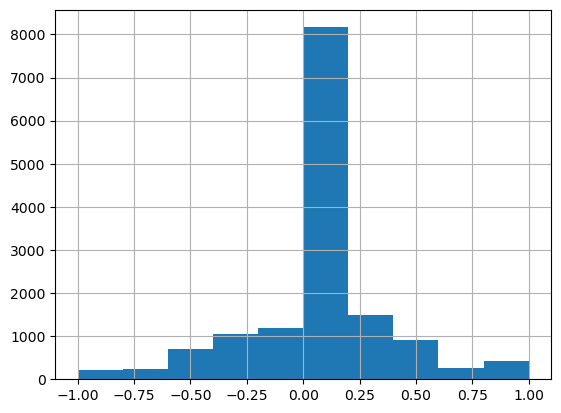

In [144]:
AirlineData.polarity.hist()

#### According to the analysis, the Virgin America company performs their services better then others. Delta and Southwest are placed at the top 3.

### Conduct aspect based sentiment analysis on the entire dataset to see what the most favorable and least favorable aspects of the airline industry are.

In [100]:
import spacy
from spacy import displacy  
nlp = spacy.load('en_core_web_sm')

In [147]:
def get_aspects(text):
    document = nlp(text)
    noun_adj_pairs = []
    #print([ (c, c.pos_) for c in doc])
    for i,token in enumerate(document):

        ### Extract noun, adjective pairs where adjectives are
        ###  after the noun  (the food was (not) tasty)
        
        if token.pos_ in ('NOUN','PROPN'):
            if i <len(document)-1 :
                adj=''
                
                for j in range(i+1,len(document)):
                    
                    if document[j].text in  ['no', 'not']:  
                        adj += 'not '
    
                    if document[j].pos_   == 'ADJ':
                        adj += document[j].text 
                        noun_adj_pairs.append((token.text,adj))
                        break
        
        ### Extract noun, adjective pairs where adjectives are
        ###  before the nouns: noun phrases (the tasty food)
        
        if token.pos_ in ('ADJ'):
            if i <len(document) -1:
                if document[i+1].pos_ in ('NOUN'):
                    noun_adj_pairs.append((document[i+1].text, token.text))
                    break

    return noun_adj_pairs

The most favorable and least favorable aspects of the airline industry on original text

In [148]:
all_aspects = []

AirlineData['aspects'] = AirlineData['text'].apply(get_aspects)

In [149]:
from collections import defaultdict

all_aspects = defaultdict(list)

for i, aspect_review in AirlineData['aspects'].iteritems():
    for aspect in aspect_review:
        all_aspects[aspect[0]].append(aspect[1])

In [150]:
aspect_count=[]
for aspect, sentiment in all_aspects.items():
    aspect_count.append((aspect, len(sentiment)))

In [151]:
aspect_count.sort(key = lambda x: x[1], reverse=True)

In [152]:
aspect_count[:10]

[('@USAirways', 1437),
 ('flight', 1377),
 ('@AmericanAir', 1344),
 ('@united', 921),
 ('@SouthwestAir', 652),
 ('@JetBlue', 487),
 ('customer', 367),
 ('time', 342),
 ('service', 333),
 ('Flight', 261)]

## Detecting most favorable and least favorable aspects of the airline industry on cleaned text

In [153]:
all_aspectsCleaned = []

AirlineData['aspects'] = AirlineData['cleaned_text'].apply(get_aspects)

In [154]:
from collections import defaultdict

all_aspectsCleaned = defaultdict(list)

for i, aspect_review in AirlineData['aspects'].iteritems():
    for aspect in aspect_review:
        all_aspectsCleaned[aspect[0]].append(aspect[1])

In [155]:
aspect_countCleaned = []
for aspect, sentiment in all_aspectsCleaned.items():
    aspect_countCleaned.append((aspect, len(sentiment)))

In [156]:
aspect_countCleaned.sort(key=lambda x: x[1], reverse=True)

#### The most favorable aspects are Flight, customer, hour, plan, time, service of the airline industry

In [157]:
aspect_countCleaned[:10]

[('flight', 1952),
 ('customer', 446),
 ('hour', 444),
 ('time', 404),
 ('thanks', 398),
 ('service', 317),
 ('airline', 267),
 ('plane', 258),
 ('bag', 254),
 ('day', 219)]

In [158]:
all_aspectsCleaned['flight'][0:10]

['bad',
 'ago',
 'earlier',
 'late',
 'recent',
 'late',
 'late',
 'direct',
 'late',
 'due']

In [159]:
all_aspectsCleaned['customer'][0:10]

['amazing',
 'best',
 'happy',
 'sad',
 'great',
 'loyal',
 'incredible',
 'good',
 'virgin',
 'best']

In [160]:
all_aspectsCleaned['hour'][0:10]

['good',
 'online',
 'lax',
 'intern',
 'due',
 'total',
 'late',
 'stellar',
 'united',
 'final']

#### The least favorable aspects in the airline industry

In [161]:
aspect_countCleaned[-40:]

[('lag', 1),
 ('any1', 1),
 ('flight2440', 1),
 ('freezing', 1),
 ('gvn', 1),
 ('jacquelyn', 1),
 ('aftr', 1),
 ('bng', 1),
 ('hstg', 1),
 ('refsd', 1),
 ('cop', 1),
 ('cash', 1),
 ('usaa', 1),
 ('americanairlines2', 1),
 ('woody', 1),
 ('prerookie', 1),
 ('rus', 1),
 ('aacom', 1),
 ('struggle', 1),
 ('at50am', 1),
 ('antonio', 1),
 ('hou', 1),
 ('guatemala', 1),
 ('desktop', 1),
 ('ringing', 1),
 ('eliza', 1),
 ('twitterhug', 1),
 ('atrocious', 1),
 ('wasnd', 1),
 ('dining', 1),
 ('iûªll', 1),
 ('ear', 1),
 ('butst', 1),
 ('silence', 1),
 ('plat', 1),
 ('dislike', 1),
 ('tyr', 1),
 ('retribution', 1),
 ('emerald', 1),
 ('george', 1)]